<a href="https://colab.research.google.com/github/whispermy/novatus_academia/blob/main/Week5_PART_I_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# 실습 파일 중 data\실습1\file.csv 파일을 colab에 올려준다. (해당 파일이 데이터 셋임)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor

### 파일 읽고 간단한 정리 & 데이터 분포 살펴보기

In [22]:
df = pd.read_csv('file.csv')
df

,Chemical1,Chemical2,Chemical3,Chemical4,Chemical5,Chemical6,Chemical7,Chemical8,Chemical9,Chemical10,Chemical11,Chemical12,Chemical13,Chemical14,Category1,Var1,Var2,Var3,Var4,Var5,Category2,Category3,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Temperature,Var29,Category4,Category5,Var30,Var31,Var32,Var33,Category6,Category7,Var34,Var35,Var36,Target,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Category8,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55
0,0.0760,1.526,0.018,0.01,0.0,0.010,0.289,0.0084,0.0014,0.021,0.011,0.02,3.0,26.0,A,300.0,1700.0,2670.0,17486.0,5.09,2.0,4.0,939.0,928.0,52.0,527.0,1097.0,1089.0,54.0,724.0,1184.0,1189.0,61.0,952.0,1251.0,1247.0,80.0,1130.0,1186.0,1188.0,48.0,1157.0,17.0,-5.0,279.0,1157.0,368,W,4,1.51,1699,2727.0,25426,1,0.0,277.520,2009.8,1.08,285.0,300.000,2671,1700,1135.0,22.3,0.08,2.09,25.2,362.7,1714.0,1724,A,1202.8,1203.0,295.0,0.339933,2.674576,220.800000,1860.925926,0.699114
1,0.0760,1.526,0.018,0.01,0.0,0.010,0.289,0.0084,0.0014,0.021,0.011,0.02,3.0,26.0,A,300.0,1700.0,2670.0,17486.0,5.09,2.0,4.0,939.0,928.0,52.0,527.0,1097.0,1089.0,54.0,724.0,1184.0,1189.0,61.0,952.0,1251.0,1247.0,80.0,1130.0,1186.0,1188.0,48.0,1157.0,17.0,-5.0,279.0,1157.0,368,W,4,1.51,1699,2727.0,28810,0,1.0,255.039,2632.2,1.13,305.0,274.780,2956,1687,1132.0,22.5,0.08,2.32,0.0,0.0,2287.4,1718,A,1202.8,1203.0,295.0,0.339933,2.674576,273.600000,2329.380531,0.137082
2,0.0760,1.526,0.018,0.01,0.0,0.010,0.289,0.0084,0.0014,0.021,0.011,0.02,3.0,26.0,A,300.0,1700.0,2670.0,17486.0,5.09,2.0,4.0,939.0,928.0,52.0,527.0,1097.0,1089.0,54.0,724.0,1184.0,1189.0,61.0,952.0,1251.0,1247.0,80.0,1130.0,1186.0,1188.0,48.0,1157.0,17.0,-5.0,279.0,1157.0,368,W,4,1.51,1699,2727.0,25169,0,0.0,230.015,2382.3,1.00,309.0,253.498,3201,1689,1127.0,24.4,0.10,2.09,20.0,283.1,1716.4,1720,A,1202.8,1203.0,295.0,0.339933,2.674576,294.067797,2382.300000,0.128763
3,0.0760,1.526,0.018,0.01,0.0,0.010,0.289,0.0084,0.0014,0.021,0.011,0.02,3.0,26.0,A,300.0,1700.0,2670.0,17486.0,5.09,2.0,4.0,939.0,928.0,52.0,527.0,1097.0,1089.0,54.0,724.0,1184.0,1189.0,61.0,952.0,1251.0,1247.0,80.0,1130.0,1186.0,1188.0,48.0,1157.0,17.0,-5.0,279.0,1157.0,368,W,4,1.51,1699,2727.0,21356,0,0.0,200.785,2459.9,0.94,344.0,228.633,3554,1686,1125.0,28.4,0.12,2.41,0.0,0.0,2288.2,1719,A,1202.8,1203.0,295.0,0.339933,2.674576,348.181818,2616.914894,0.550319
4,0.0760,1.526,0.018,0.01,0.0,0.010,0.289,0.0084,0.0014,0.021,0.011,0.02,3.0,26.0,A,300.0,1700.0,2670.0,17486.0,5.09,2.0,4.0,939.0,928.0,52.0,527.0,1097.0,1089.0,54.0,724.0,1184.0,1189.0,61.0,952.0,1251.0,1247.0,80.0,1130.0,1186.0,1188.0,48.0,1157.0,17.0,-5.0,279.0,1157.0,368,W,4,1.51,1699,2727.0,41684,1,0.0,175.832,4369.2,0.92,633.0,200.035,4054,1690,1107.0,23.0,0.11,2.09,43.0,257.1,4125.8,4140,B,1202.8,1203.0,295.0,0.339933,2.674576,561.320755,4749.130435,0.290308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83573,0.2048,0.283,0.000,0.02,0.0,0.001,0.193,0.0088,0.0035,0.016,0.020,0.02,1.0,24.0,D,300.0,2400.0,3510.0,50461.0,4.66,1.0,1.0,922.0,910.0,35.0,627.0,1141.0,1094.0,38.0,742.0,1233.0,1234.0,66.0,1021.0,1239.0,1235.0,48.0,1129.0,1147.0,1149.0,34.0,1137.0,19.0,17.0,211.0,1137.0,554,W,1,1.05,3580,2435.0,39302,1,0.0,237.661,3235.8,0.88,428.0,262.238,2554,3845,1105.0,24.7,0.09,2.09,40.0,378.1,2555.0,2575,B,1199.8,1199.8,221.0,0.261833,2.638009,451.886792,3677.045455,NaN
83574,0.2048,0.283,0.000,0.02,0.0,0.001,0.193,0.0088,0.0035,0.016,0.020,0.02,1.0,24.0,D,300.0,2400.0,3510.0,50461.0,4.66,1.0,1.0,922.0,910.0,35.0,627.0,1141.0,1094.0,38.0,742.0,1233.0,1234.0,66.0,1021.0,1239.0,1235.0,48.0,1129.0,1147.0,1149.0,34.0,1137.0,19.0,17.0,211.0,1137.0,554,W,1,1.05,358

In [23]:
df.columns

Index(['Chemical1', 'Chemical2', 'Chemical3', 'Chemical4', 'Chemical5',
       'Chemical6', 'Chemical7', 'Chemical8', 'Chemical9', 'Chemical10',
       'Chemical11', 'Chemical12', 'Chemical13', 'Chemical14', 'Category1',
       'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Category2', 'Category3',
       'Var6', 'Var7', 'Var8', 'Var9', 'Var10', 'Var11', 'Var12', 'Var13',
       'Var14', 'Var15', 'Var16', 'Var17', 'Var18', 'Var19', 'Var20', 'Var21',
       'Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28',
       'Temperature', 'Var29', 'Category4', 'Category5', 'Var30', 'Var31',
       'Var32', 'Var33', 'Category6', 'Category7', 'Var34', 'Var35', 'Var36',
       'Target', 'Var37', 'Var38', 'Var39', 'Var40', 'Var41', 'Var42', 'Var43',
       'Var44', 'Var45', 'Var46', 'Var47', 'Category8', 'Var48', 'Var49',
       'Var50', 'Var51', 'Var52', 'Var53', 'Var54', 'Var55'],
      dtype='object')

In [24]:
#Variable 정리

Category_variables = ['Category1', 'Category2', 'Category3', 'Category4', 'Category5', 'Category6', 'Category7', 'Category8']
Numeric_variables = ['Chemical1', 'Chemical2', 'Chemical3', 'Chemical4', 'Chemical5','Chemical6', 'Chemical7', 'Chemical8', 'Chemical9', 'Chemical10', 'Chemical11', 'Chemical12', 'Chemical13', 'Chemical14',
                     'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9', 'Var10', 'Var11', 'Var12', 'Var13',
                     'Var14', 'Var15', 'Var16', 'Var17', 'Var18', 'Var19', 'Var20', 'Var21','Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29',
                     'Var30', 'Var31', 'Var32', 'Var33', 'Var34', 'Var35', 'Var36', 'Var37', 'Var38', 'Var39', 'Var40', 'Var41', 'Var42', 'Var43',
                     'Var44', 'Var45', 'Var46', 'Var47', 'Var48', 'Var49', 'Var50', 'Var51', 'Var52', 'Var53', 'Var54', 'Var55']
Temperature_variable = ['Temperature']
Target_variables = ['Target']


In [25]:
# 변수에 따라서 Dataframe 정리
df = df[Category_variables + Numeric_variables + Temperature_variable + Target_variables].copy()
df.columns

Index(['Category1', 'Category2', 'Category3', 'Category4', 'Category5',
       'Category6', 'Category7', 'Category8', 'Chemical1', 'Chemical2',
       'Chemical3', 'Chemical4', 'Chemical5', 'Chemical6', 'Chemical7',
       'Chemical8', 'Chemical9', 'Chemical10', 'Chemical11', 'Chemical12',
       'Chemical13', 'Chemical14', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5',
       'Var6', 'Var7', 'Var8', 'Var9', 'Var10', 'Var11', 'Var12', 'Var13',
       'Var14', 'Var15', 'Var16', 'Var17', 'Var18', 'Var19', 'Var20', 'Var21',
       'Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29',
       'Var30', 'Var31', 'Var32', 'Var33', 'Var34', 'Var35', 'Var36', 'Var37',
       'Var38', 'Var39', 'Var40', 'Var41', 'Var42', 'Var43', 'Var44', 'Var45',
       'Var46', 'Var47', 'Var48', 'Var49', 'Var50', 'Var51', 'Var52', 'Var53',
       'Var54', 'Var55', 'Temperature', 'Target'],
      dtype='object')

In [26]:
# 결측치 여부 확인
df.isnull().sum()

Category1          3
Category2          3
Category3          3
Category4          0
Category5          0
Category6          0
Category7          1
Category8          0
Chemical1          3
Chemical2          3
Chemical3          3
Chemical4          3
Chemical5          3
Chemical6          3
Chemical7          3
Chemical8          3
Chemical9          3
Chemical10         3
Chemical11         3
Chemical12         3
Chemical13         3
Chemical14         3
Var1               3
Var2               3
Var3               3
Var4               3
Var5               3
Var6               3
Var7               3
Var8               3
Var9               3
Var10              3
Var11              3
Var12              3
Var13              3
Var14              3
Var15              3
Var16              3
Var17              3
Var18              3
Var19              3
Var20              3
Var21              3
Var22              3
Var23              3
Var24              3
Var25              3
Var26        

In [27]:
# 결측치 전체 확인 방법 - default로 정보가 10개 이외에는 생략되어 일부 보이지 않을 수 있다.
pd.set_option('display.max_row',500)
df.isnull().sum()

Category1          3
Category2          3
Category3          3
Category4          0
Category5          0
Category6          0
Category7          1
Category8          0
Chemical1          3
Chemical2          3
Chemical3          3
Chemical4          3
Chemical5          3
Chemical6          3
Chemical7          3
Chemical8          3
Chemical9          3
Chemical10         3
Chemical11         3
Chemical12         3
Chemical13         3
Chemical14         3
Var1               3
Var2               3
Var3               3
Var4               3
Var5               3
Var6               3
Var7               3
Var8               3
Var9               3
Var10              3
Var11              3
Var12              3
Var13              3
Var14              3
Var15              3
Var16              3
Var17              3
Var18              3
Var19              3
Var20              3
Var21              3
Var22              3
Var23              3
Var24              3
Var25              3
Var26        

In [28]:
# Var55 에서 결측치가 27266개 이므로 이 데이터는 이용 가치가 없음으로 판단.
# 따라서 해당 column을 삭제한다. 
df = df.drop(['Var55'],axis=1)
Numeric_variables.remove('Var55')

In [30]:
# 결측치가 존재하는 데이터들의 행을 제거
df = df.dropna(axis=0)

# 제거 후 데이터 확인
df.isnull().sum()

Category1      0
Category2      0
Category3      0
Category4      0
Category5      0
Category6      0
Category7      0
Category8      0
Chemical1      0
Chemical2      0
Chemical3      0
Chemical4      0
Chemical5      0
Chemical6      0
Chemical7      0
Chemical8      0
Chemical9      0
Chemical10     0
Chemical11     0
Chemical12     0
Chemical13     0
Chemical14     0
Var1           0
Var2           0
Var3           0
Var4           0
Var5           0
Var6           0
Var7           0
Var8           0
Var9           0
Var10          0
Var11          0
Var12          0
Var13          0
Var14          0
Var15          0
Var16          0
Var17          0
Var18          0
Var19          0
Var20          0
Var21          0
Var22          0
Var23          0
Var24          0
Var25          0
Var26          0
Var27          0
Var28          0
Var29          0
Var30          0
Var31          0
Var32          0
Var33          0
Var34          0
Var35          0
Var36          0
Var37         

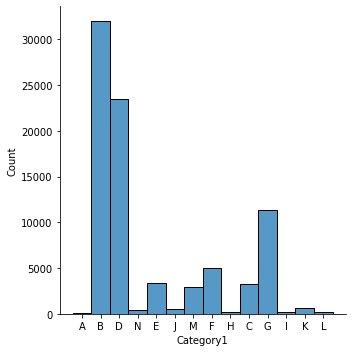

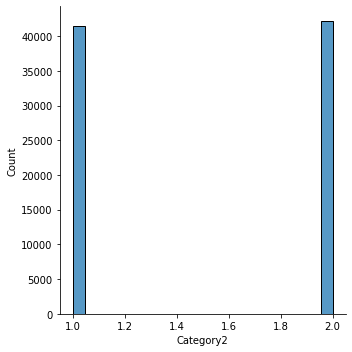

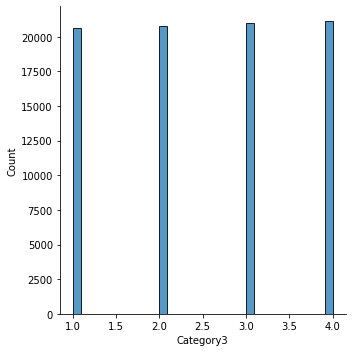

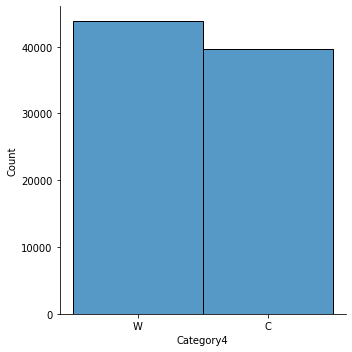

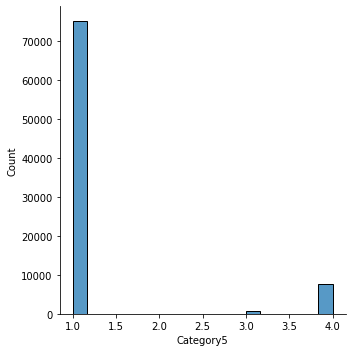

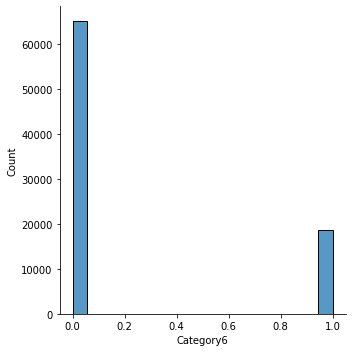

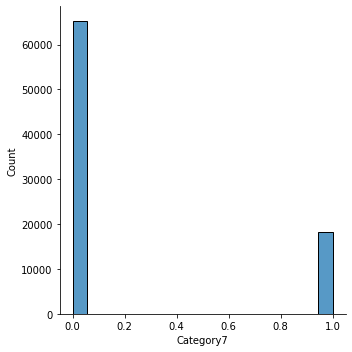

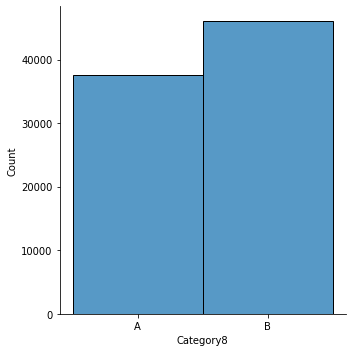

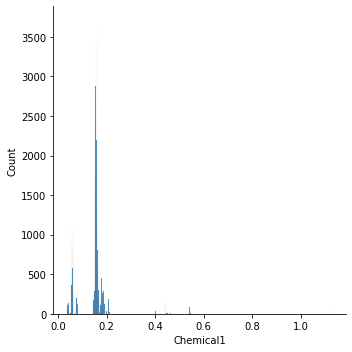

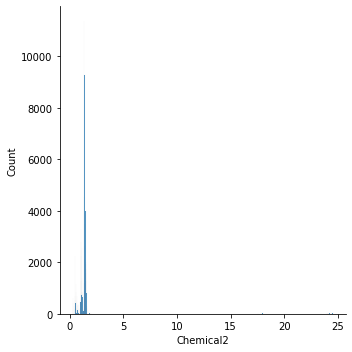

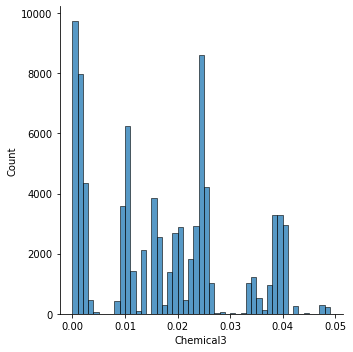

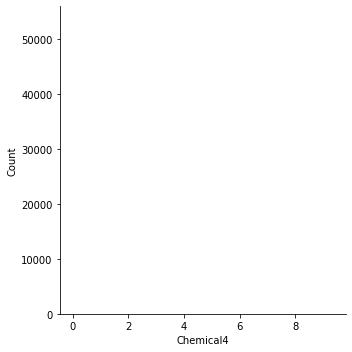

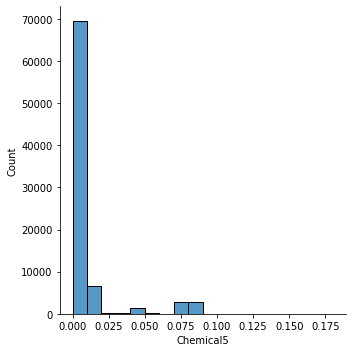

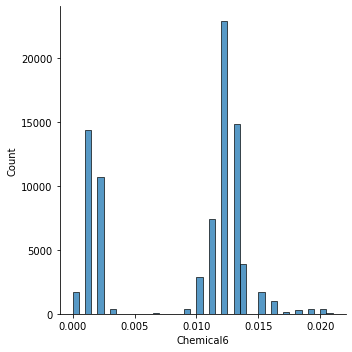

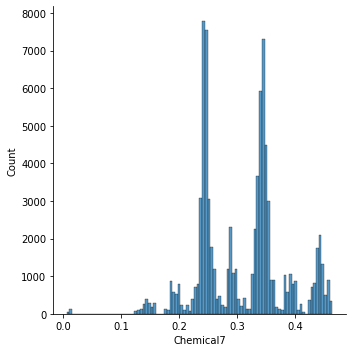

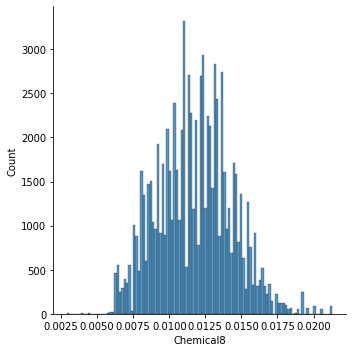

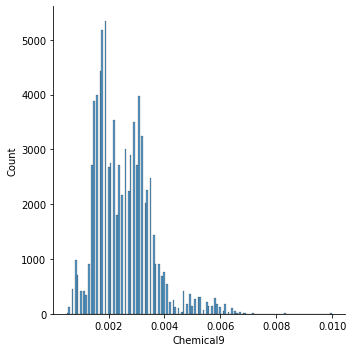

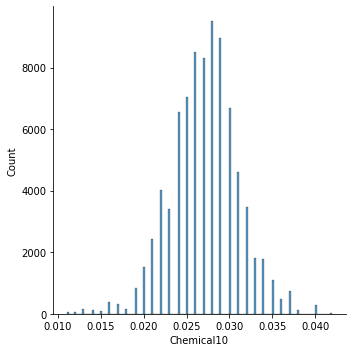

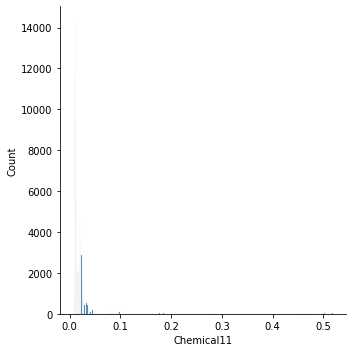

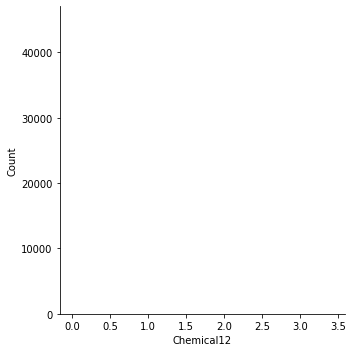

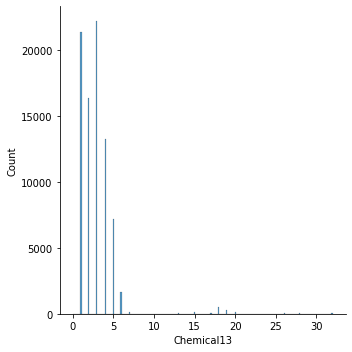

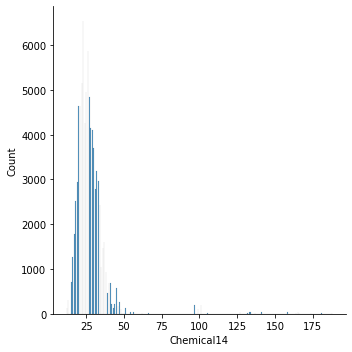

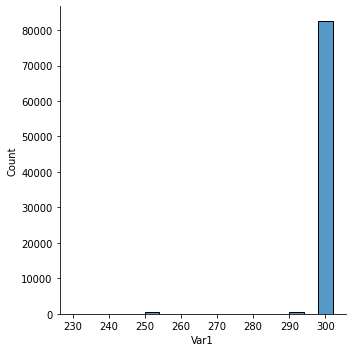

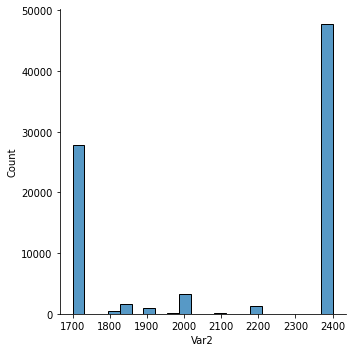

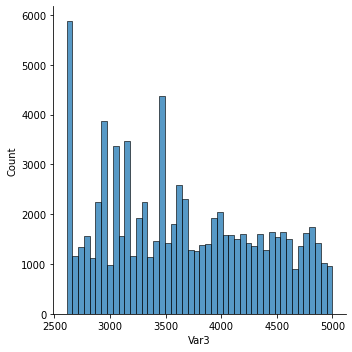

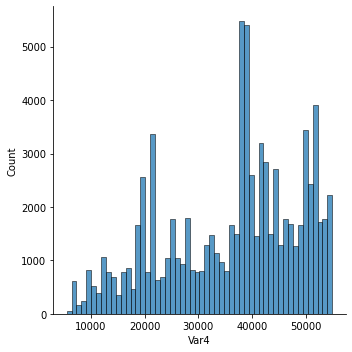

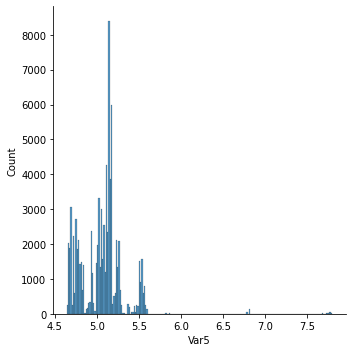

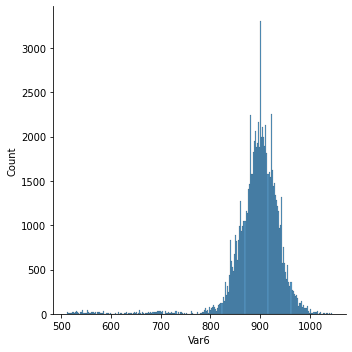

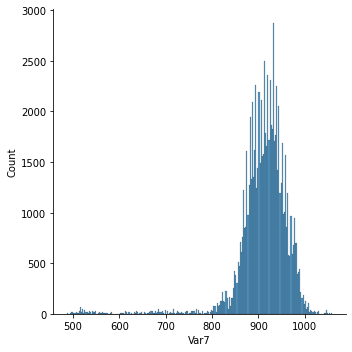

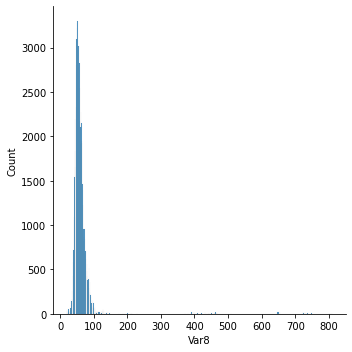

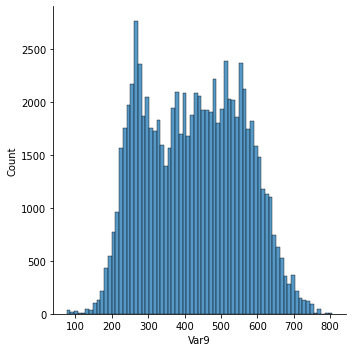

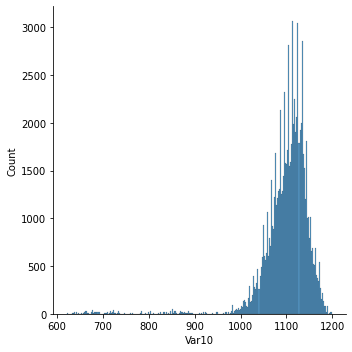

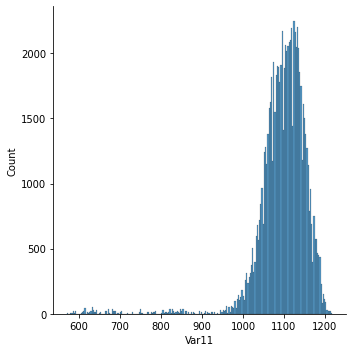

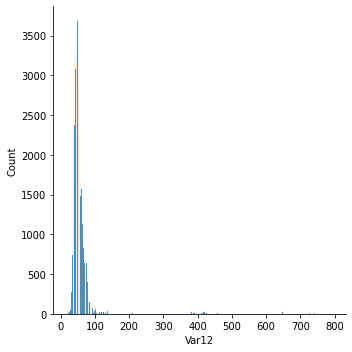

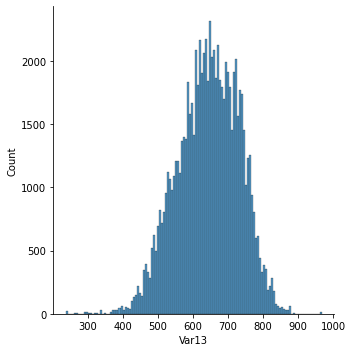

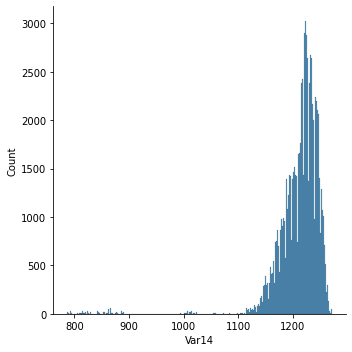

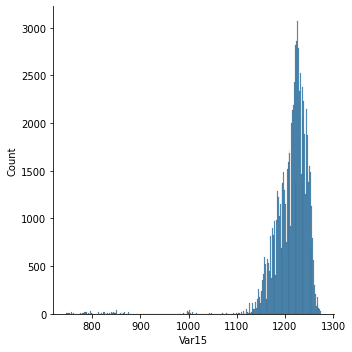

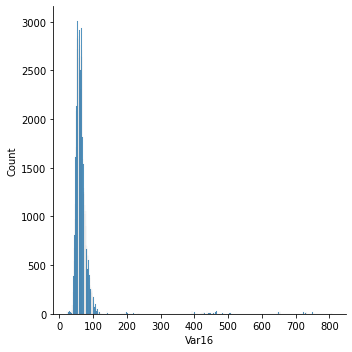

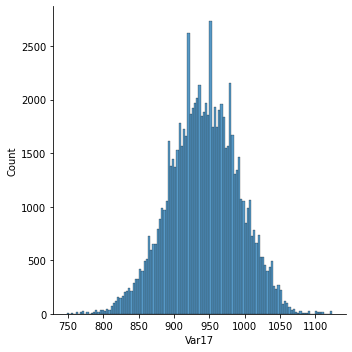

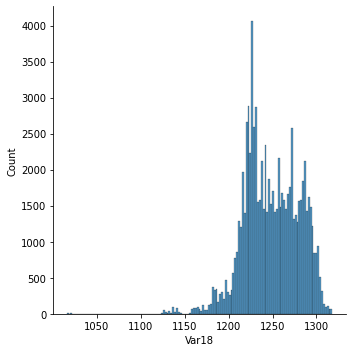

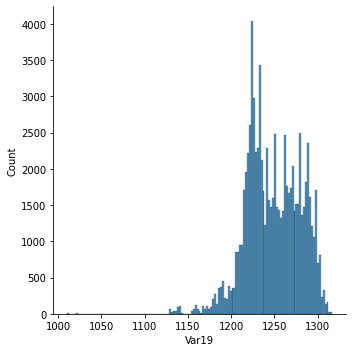

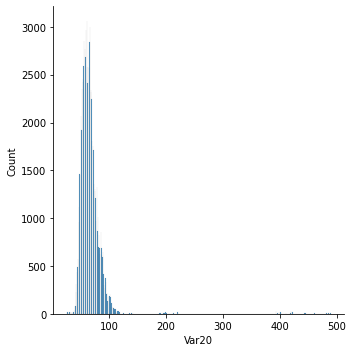

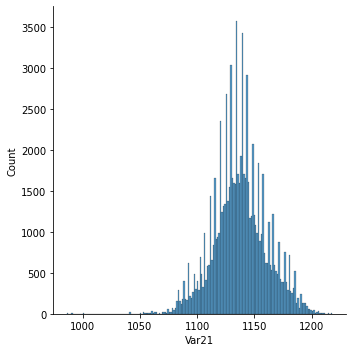

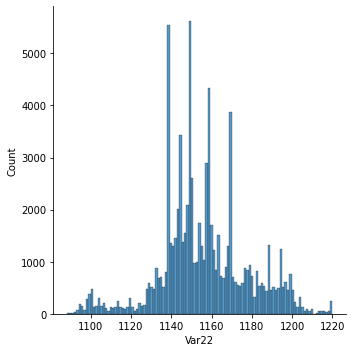

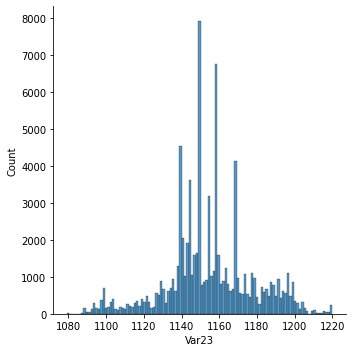

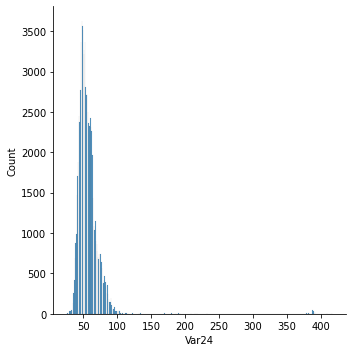

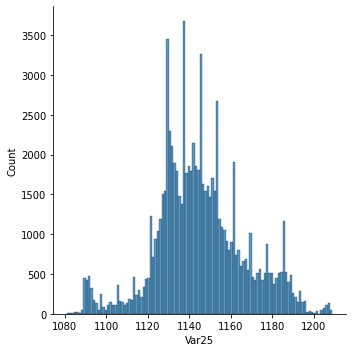

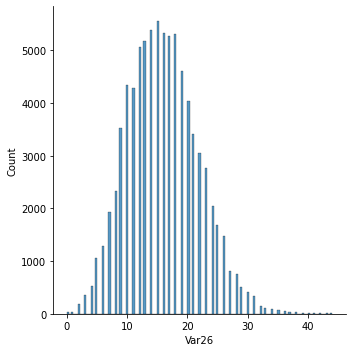

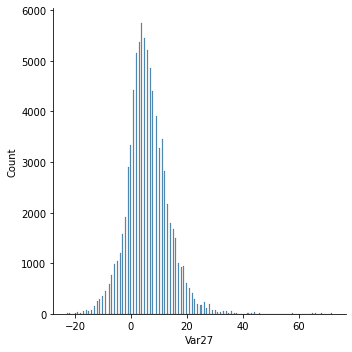

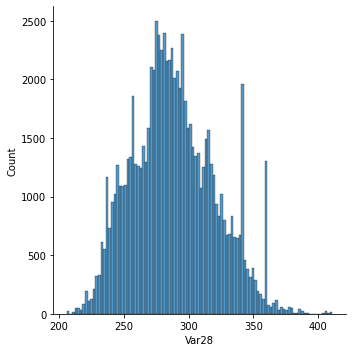

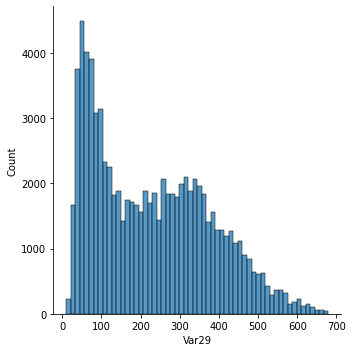

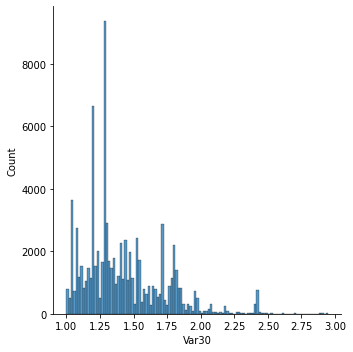

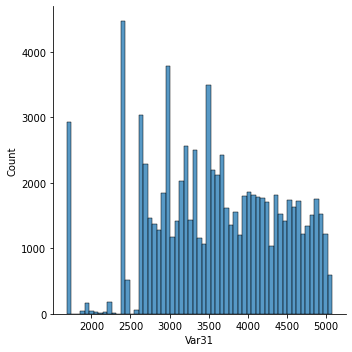

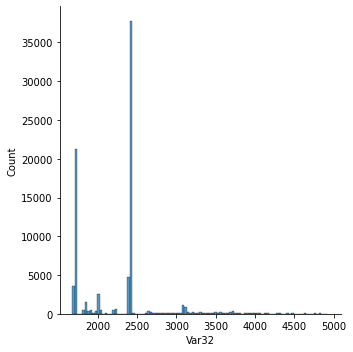

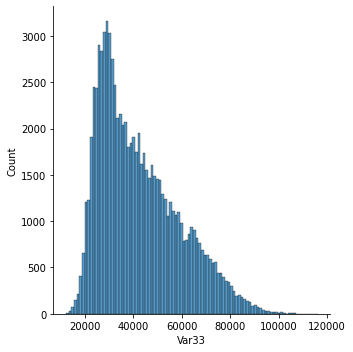

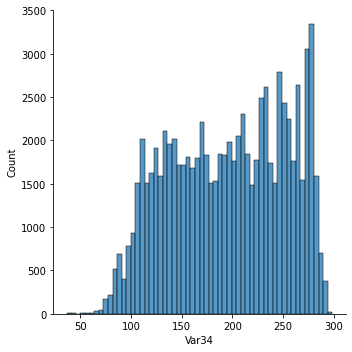

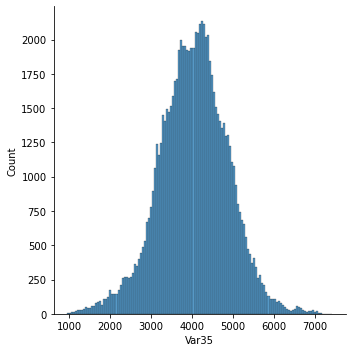

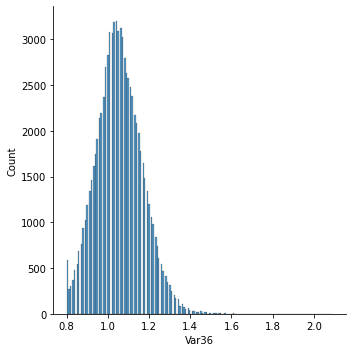

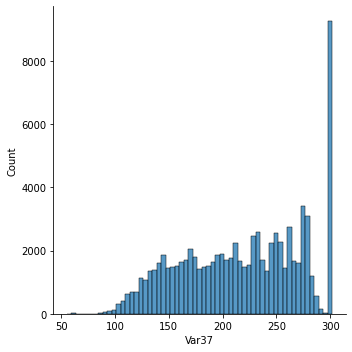

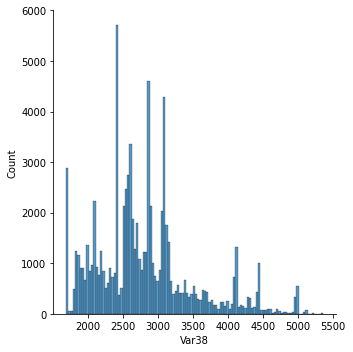

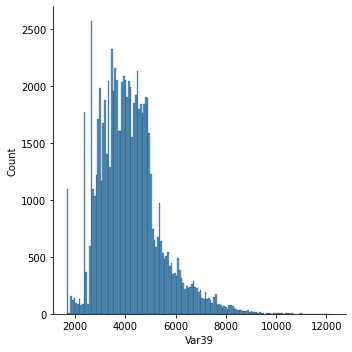

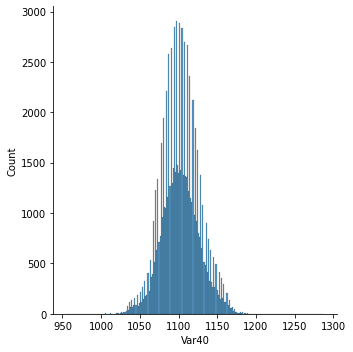

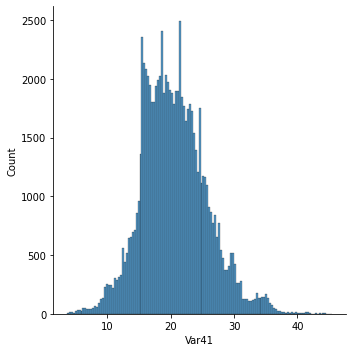

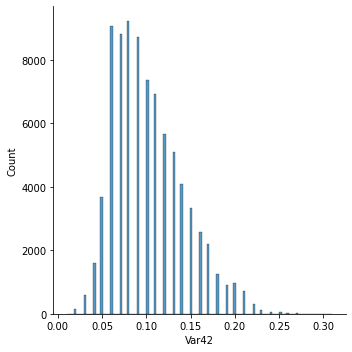

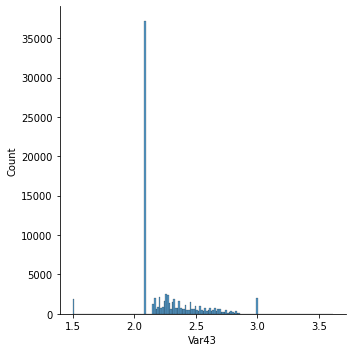

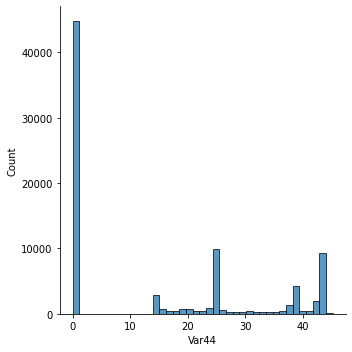

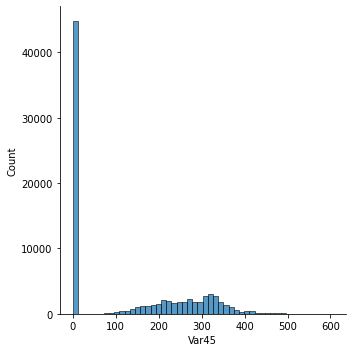

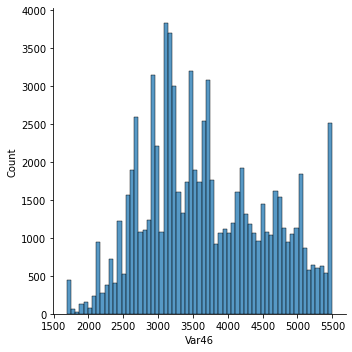

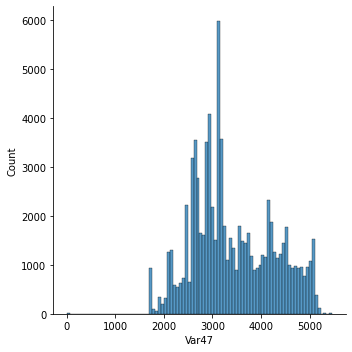

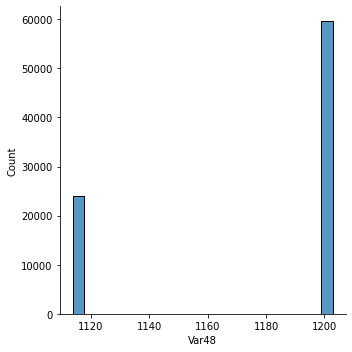

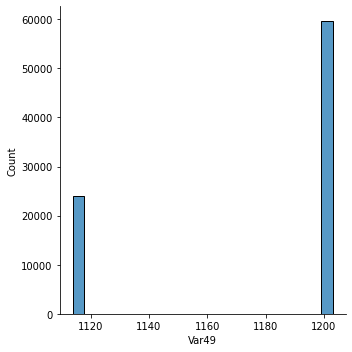

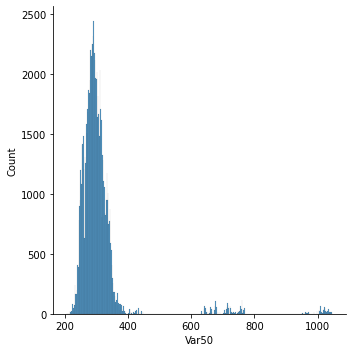

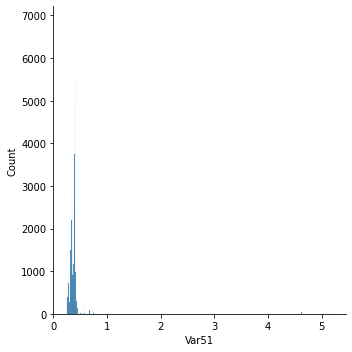

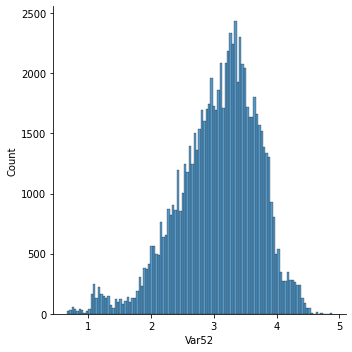

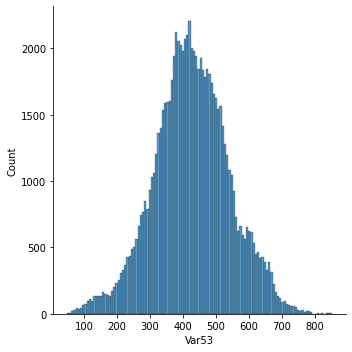

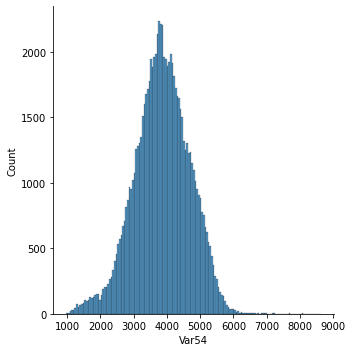

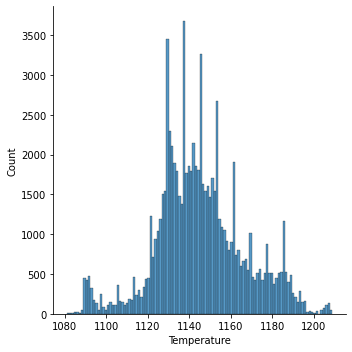

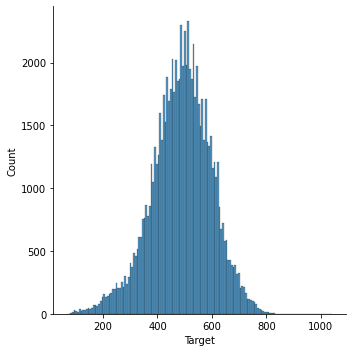

In [31]:
# sns.displot(df['Category1'])
# plt.show()

for i in df.columns:
  print('============================================')
  sns.displot(df[i])
  plt.show()
  print()


### 분석을 위한 전처리

#### One_hot_Encoding

In [33]:
# Category_variables 의 데이터 타입 확인
df[Category_variables].dtypes

Category1     object
Category2    float64
Category3    float64
Category4     object
Category5      int64
Category6      int64
Category7    float64
Category8     object
dtype: object

In [34]:
# Category_variables 의 데이터 타입 변경
df[Category_variables] = df[Category_variables].astype('category')

# Category_variables 의 데이터 타입 재확인
df[Category_variables].dtypes

Category1    category
Category2    category
Category3    category
Category4    category
Category5    category
Category6    category
Category7    category
Category8    category
dtype: object

In [36]:
# 각 변수의 클래스 확인하기
# df['Category1'].unique()
for i in Category_variables:
  print(i)
  print(df[i].unique())
  print("==============================================================")

Category1
['A', 'B', 'D', 'N', 'E', ..., 'C', 'G', 'I', 'K', 'L']
Length: 14
Categories (14, object): ['A', 'B', 'D', 'N', ..., 'G', 'I', 'K', 'L']
Category2
[2.0, 1.0]
Categories (2, float64): [2.0, 1.0]
Category3
[4.0, 2.0, 3.0, 1.0]
Categories (4, float64): [4.0, 2.0, 3.0, 1.0]
Category4
['W', 'C']
Categories (2, object): ['W', 'C']
Category5
[4, 1, 3]
Categories (3, int64): [4, 1, 3]
Category6
[1, 0]
Categories (2, int64): [1, 0]
Category7
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Category8
['A', 'B']
Categories (2, object): ['A', 'B']


In [38]:
# get_dummies라는 함수를 이용하여 one hot encoding을 진행함.
ohe_encoding = pd.get_dummies(df[Category_variables])
ohe_encoding

,Category1_A,Category1_B,Category1_C,Category1_D,Category1_E,Category1_F,Category1_G,Category1_H,Category1_I,Category1_J,Category1_K,Category1_L,Category1_M,Category1_N,Category2_1.0,Category2_2.0,Category3_1.0,Category3_2.0,Category3_3.0,Category3_4.0,Category4_C,Category4_W,Category5_1,Category5_3,Category5_4,Category6_0,Category6_1,Category7_0.0,Category7_1.0,Category8_A,Category8_B
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83573,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1
83574,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1
83575,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1
83576,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1


In [72]:
# df 내부의 기존 Categorical_Variable 제거 후 one hot encoding 결과 데이터를 df에 추가함.
df = df.drop(Category_variables, axis=1)
df = pd.concat([ohe_encoding, df], axis=1)
Category_variables = ohe_encoding.columns.tolist()

#### 데이터 나누기

In [73]:
# 해당 데이터가 도메인을 살펴보면 온도에 많이 관련되어 있으므로, 온도별로 데이터를 나눈다.
df_cat1 = df[df['Temperature'] < 1100].copy().reset_index(drop=True)
df_cat2 = df[(df['Temperature'] >= 1100) & (df['Temperature'] < 1120)].copy().reset_index(drop=True)

# 20도별로 구간을 5까지 나누기
# 실습

#### 각각의 데이터 별로 Train / Validation / Test 구분짓기

In [74]:
# 온도로 나눠진 데이터에서 train/validation/test를 구분짓는다.
df_cat1_train = df_cat1.iloc[:int(len(df_cat1)*0.8), :].copy().reset_index(drop=True)
df_cat1_valid = df_cat1.iloc[int(len(df_cat1)*0.8):int(len(df_cat1)*0.9), :].copy().reset_index(drop=True)
df_cat1_test = df_cat1.iloc[int(len(df_cat1)*0.9):, :].copy().reset_index(drop=True)

In [75]:
# 구분해야 할 데이터가 많으므로 함수형태로 만들어서 사용한다. 
def data_divide(df):
  train_df = df.iloc[:int(len(df)*0.8), :].copy().reset_index(drop=True)
  valid_df = df.iloc[int(len(df)*0.8):int(len(df)*0.9), :].copy().reset_index(drop=True)
  test_df = df.iloc[int(len(df)*0.9):, :].copy().reset_index(drop=True)
  return train_df, valid_df, test_df

In [76]:
# 함수를 이용하여 데이터를 나누기
df_cat1_train, df_cat1_valid, df_cat1_test = data_divide(df_cat1)
# df_cat2_train, df_cat2_valid, df_cat2_test = data_divide(df_cat2)
# df_cat3_train, df_cat3_valid, df_cat3_test = data_divide(df_cat3)
# df_cat4_train, df_cat4_valid, df_cat4_test = data_divide(df_cat4)
# df_cat5_train, df_cat5_valid, df_cat5_test = data_divide(df_cat5)


# 데이터 분석

In [71]:
# 랜덤 포레스트 모델 생성
clf = RandomForestRegressor(max_depth=10, random_state=0)
clf.fit(df_cat1_train[Category_variables+Numeric_variables], df_cat1_train[Target_variables])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [77]:
# 예측값 생성하기
train_predict = clf.predict(df_cat1_train[Category_variables+Numeric_variables])
valid_predict = clf.predict(df_cat1_valid[Category_variables+Numeric_variables])
test_predict = clf.predict(df_cat1_test[Category_variables+Numeric_variables])

##  분석결과 Visualization

In [80]:
# 결과보기
print("MSE")
print(mean_squared_error(test_predict,df_cat1_test[Target_variables]))
print("RMSE")
print(np.sqrt(mean_squared_error(test_predict,df_cat1_test[Target_variables])))
print("R Score")
print(r2_score(test_predict,df_cat1_test[Target_variables]))

MSE
448.72906113935846
RMSE
21.183225937976456
R Score
0.9557658249978153


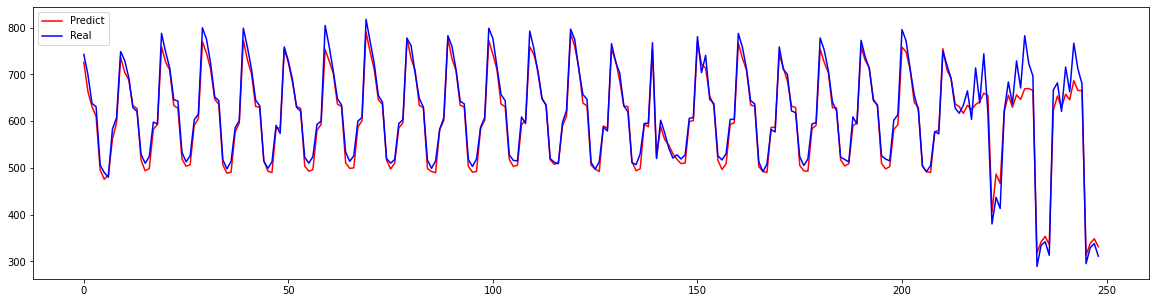

In [82]:
# 선형 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(test_predict, c = 'r', label='Predict')
plt.plot(df_cat1_test[Target_variables], c='b', label='Real')
plt.legend()

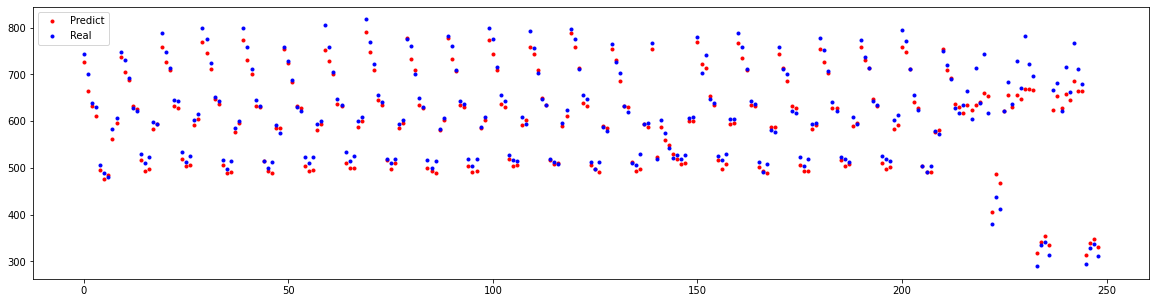

In [84]:
# 분산형 그래프 그리기
plt.figure(figsize=(20,5))
plt.scatter(range(0,len(df_cat1_test)), test_predict, marker='.', c = 'r', label='Predict')
plt.scatter(range(0,len(df_cat1_test)), df_cat1_test[Target_variables], marker='.', c='b', label='Real')
plt.legend()